# Drug Interaction Classifier - Experimentation Notebook
## Data Exploration, Preprocessing, and Model Prototyping

In [1]:
import pandas as pd 

df = pd.read_csv("Data/drug200.csv")

In [3]:
drug_df = df.sample(frac=1)
drug_df.head(3)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
54,68,F,HIGH,NORMAL,10.189,drugB
2,47,M,LOW,HIGH,10.114,drugC
141,64,F,LOW,NORMAL,25.741,DrugY


In [5]:
from sklearn.model_selection import train_test_split
X = drug_df.drop("Drug", axis=1).values
y = drug_df.Drug.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=125)

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

cat_col = [1,2,3]
num_col = [0,4]

transform = ColumnTransformer([("encoder", OrdinalEncoder(), cat_col),
                               ("num_imputer", SimpleImputer(strategy="median"), num_col ),
                               ("num_scaler", StandardScaler(), num_col)])
pipeline = Pipeline(
    steps=[("preporcessing", transform),
           ("model", RandomForestClassifier(n_estimators=100, random_state=125))])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preporcessing',
                 ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),
                                                  [1, 2, 3]),
                                                 ('num_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  [0, 4]),
                                                 ('num_scaler',
                                                  StandardScaler(), [0, 4])])),
                ('model', RandomForestClassifier(random_state=125))])

In [15]:
from sklearn.metrics import accuracy_score, f1_score

predictions = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average="macro")

print("Accuracy:", str(round(accuracy, 2)*100)+"%", "F1:", round(f1, 2))


Accuracy: 98.0% F1: 0.98


In [18]:
with open("Results/metrics.txt", "w") as outfile:
    outfile.write(f"Accuracy: {round(accuracy, 2)}\nF1 Score: {round(f1, 2)}")

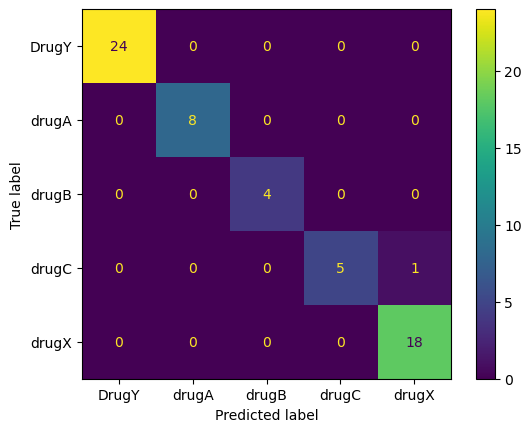

In [19]:
import matplotlib.pyplot as plt 
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, predictions, labels=pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot()
plt.savefig("Results/mode_results.png", dpi=120)

In [22]:
import skops.io as sio 
sio.dump(pipeline, "Model/drug_pipeline.skops")